Importing some required libraries of *python*
- `Numpy` numerical python is used for tasks related to arrays and Linear Algebra
- `Pandas` used for data manipulation and deals with dataframes
- `Matplotlib` used for data visualization 

we will be using the `%matplotlib` function of ipython that works on our plots and make them appear and `inline` store them into the document 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

Exporing and uploading the given data into our dataframe **student_data** using the in-built function `pd.read_csv()` 

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)
print("Success.... Data got loaded into our dataframe..")
print(student_data.to_string()) 

Success.... Data got loaded into our dataframe..
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Getting the information of our newly created dataframe using `.info()` function 

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Exploring the columns of our dataframe using `.columns` function 

In [4]:
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

Checking for any null or missing values in our dataframe 

In [5]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Sorting the data based on one attribute for our understanding about the regression between the variables 

In [6]:
student_data.sort_values(by = "Scores", ascending="True")

,Hours,Scores
14,1.1,17
5,1.5,20
0,2.5,21
17,1.9,24
9,2.7,25
2,3.2,27
20,2.7,30
4,3.5,30
16,2.5,30
22,3.8,35


For better understanding, we use matplotlib lib and visualizable our data(`Hours vs Score`)

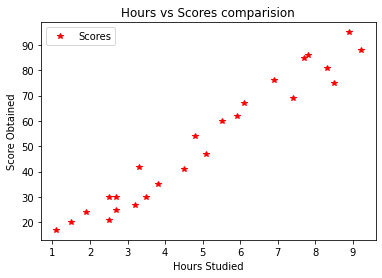

In [7]:
student_data.plot(x='Hours', y='Scores', style='*',color='r')
plt.title('Hours vs Scores comparision')
plt.xlabel("Hours Studied")
plt.ylabel("Score Obtained")
plt.show()

- we can clearly observe the ascending plots, which depicts the `positive regression` between our two variables 
- Hours will be the "*independent variable*" and the Score is the "*dependent variable*"
 
 for more understanding, we can plot a bar graph

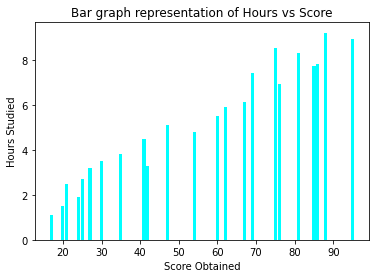

In [8]:
scores=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
hours = [2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8]
plt.bar(scores,hours,color="aqua")
plt.xlabel("Score Obtained")
plt.ylabel("Hours Studied")
plt.title("Bar graph representation of Hours vs Score")
plt.show()

using an in-built method of pandas `.iloc[]` we can retrieve or work on rows of a dataframe

In [9]:
x = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values

finding the initial dimensions of our dataframe 

In [10]:
student_data.shape

(25, 2)

using the `train_test_split` function of the library `sklearn` we can easily split the available data into **train** and the **test** data 

- here we gave 35:100 for test and train 

In [11]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35,random_state=0) 

finding the dimensions of newly formed sets after splitting the data 

In [12]:
x_train.shape

(16, 1)

In [13]:
y_train.shape

(16,)

In [14]:
x_test.shape

(9, 1)

In [15]:
y_test.shape

(9,)

In [16]:
x_train

array([[1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [17]:
y_train

array([17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41],
      dtype=int64)

In [18]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8],
       [6.9]])

In [19]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86, 76], dtype=int64)

performing the regression task using `LinearRegression` from sklearn lib and using `.fit()` function learns from data passed as parameters

In [20]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Training completed")

Training completed


finding the `coefficients` of our linear regression model 

In [21]:
lr.coef_

array([9.69062469])

`.score()` function calculates the performance of our model 

In [22]:
print("Accuracy : ",lr.score(x_test, y_test)*100)

Accuracy :  95.55700801388129


In [23]:
lr.intercept_

2.5069547569547694

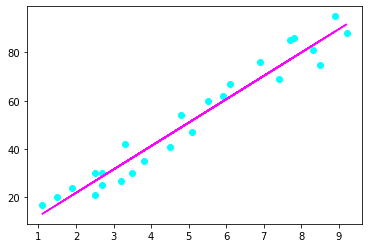

In [24]:
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y, c='aqua')
plt.plot(x, line, color='magenta');
plt.show()

In [25]:
y_prediction = lr.predict(x_test)
print(y_prediction)

[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


In [26]:
pd.DataFrame(np.c_[x_test,y_test,y_prediction], columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,1.5,20.0,17.042892
1,3.2,27.0,33.516954
2,7.4,69.0,74.217577
3,2.5,30.0,26.733516
4,5.9,62.0,59.681640
5,3.8,35.0,39.331329
6,1.9,24.0,20.919142
7,7.8,86.0,78.093827
8,6.9,76.0,69.372265


In [27]:
print(lr.score(x_test,y_test)*100)

95.55700801388129


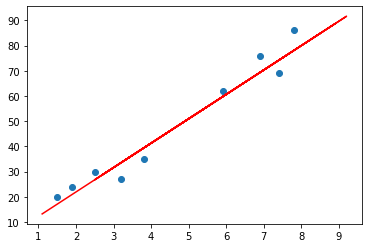

In [28]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="red")

In [29]:
hours = 9.25
predicted = lr.coef_*hours + lr.intercept_
print("No of StudyHours = ",hours)
print("Predicted Percentage(Score) = ",predicted[0])
y_predict=lr.predict([[hours]])

No of StudyHours =  9.25
Predicted Percentage(Score) =  92.14523314523314
